<a href="https://colab.research.google.com/github/anandramm/Machine_learning-/blob/master/DL_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries For Data Preprocessing

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/cancer_classification.csv')
#Check if the Dataframe has any null values
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64

In [15]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


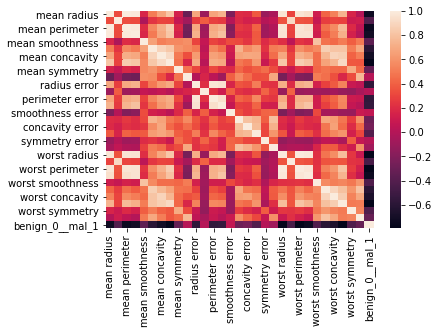

In [17]:
sns.heatmap(df.corr())

Train Test Split

In [26]:
from sklearn.model_selection import train_test_split       
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

In [22]:
X=df.drop('benign_0__mal_1',axis=1).values
y=df['benign_0__mal_1'].values

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=101)

In [27]:
scaler=MinMaxScaler()

In [29]:
scaler.fit_transform(X_train)

array([[0.30280346, 0.28779168, 0.28292922, ..., 0.35910653, 0.13207175,
        0.09320478],
       [0.27589412, 0.25160636, 0.25735448, ..., 0.33852234, 0.33609304,
        0.11976912],
       [0.38255296, 0.26885357, 0.36398575, ..., 0.28549828, 0.40114331,
        0.11681753],
       ...,
       [0.44468907, 0.3361515 , 0.42142408, ..., 0.52233677, 0.21387739,
        0.05791683],
       [0.57678947, 0.39634765, 0.55279156, ..., 0.70378007, 0.41671595,
        0.2863702 ],
       [0.32922354, 0.30334799, 0.31402418, ..., 0.44123711, 0.25310467,
        0.23133937]])

In [31]:
scaler.fit(X_test)

MinMaxScaler(copy=True, feature_range=(0, 1))

Deep Learning Classification

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [35]:
X_train.shape

(426, 30)

In [38]:
model=Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
#BINARY CLASSIFICATION
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [49]:
model.fit(x=X_train,y=y_train,epochs=600,verbose=1,validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0347 - val_loss: 0.1426
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0423 - val_loss: 0.1666
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0492 - val_loss: 0.2023
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0457 - val_loss: 0.1659
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0329 - val_loss: 0.1481
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0354 - val_loss: 0.2435
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0693 - val_loss: 0.2170
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0466 - val_loss: 0.1367
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0467 - val_loss: 0.1761
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0459 - val_loss: 0.2113
Epoch 11/

In [50]:
losses=pd.DataFrame(model.history.history)

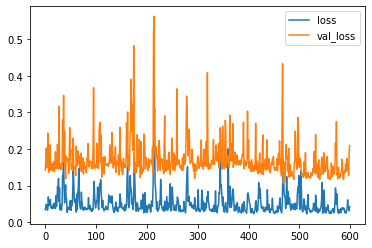

In [52]:
losses.plot()

In [54]:
model=Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
#BINARY CLASSIFICATION
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [57]:
from tensorflow.keras.callbacks import EarlyStopping

In [62]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [64]:
model.fit(x=X_train,y=y_train,epochs=600,verbose=1,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1299 - val_loss: 0.1286
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1071 - val_loss: 0.0945
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1038 - val_loss: 0.1668
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1394 - val_loss: 0.0959
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1150 - val_loss: 0.1674
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1144 - val_loss: 0.0930
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1080 - val_loss: 0.0998
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0960 - val_loss: 0.1397
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1019 - val_loss: 0.1020
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1042 - val_loss: 0.1462
Epoch 11/

In [66]:
losses_1=pd.DataFrame(model.history.history)

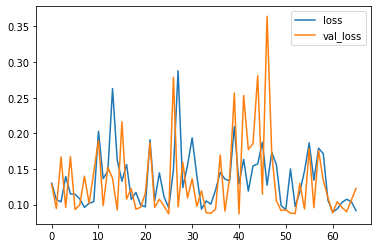

In [69]:
losses_1.plot()

In [72]:
model=Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))
#BINARY CLASSIFICATION
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [74]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [76]:
model.fit(x=X_train,y=y_train,epochs=600,verbose=1,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5295 - val_loss: 0.3401
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5450 - val_loss: 0.3832
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5214 - val_loss: 0.3764
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4751 - val_loss: 0.3431
Epoch 5/600
14/14 [==============================] - 0s 12ms/step - loss: 0.5595 - val_loss: 0.3393
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5090 - val_loss: 0.3453
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4608 - val_loss: 0.3401
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4857 - val_loss: 0.3238
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4735 - val_loss: 0.3470
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4882 - val_loss: 0.3365
Epoch 11

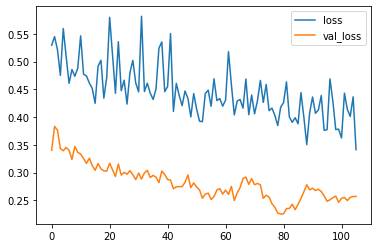

In [81]:
losses_2=pd.DataFrame(model.history.history)
losses_2.plot()

In [86]:
pred=model.predict_classes(X_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [88]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[46  9]
 [ 2 86]]
              precision    recall  f1-score   support

           0       0.96      0.84      0.89        55
           1       0.91      0.98      0.94        88

    accuracy                           0.92       143
   macro avg       0.93      0.91      0.92       143
weighted avg       0.93      0.92      0.92       143

